In [1]:
library(ggplot2)
library(reshape2)
library(cowplot)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



## Input
Data are from QIIME2. Extracted the pd_vector.qza and shannon_vector.qza to get the TSV files. Alpha files are rarefied to the smallest sampling depth of the sequence file set.

In [2]:
md <- read.table("data/METADATA.txt", sep="\t", header=TRUE, comment.char="", row.names=1)
phylo_div <- read.table("data/alpha_pd_all.tsv")
shannon_div <- read.table("data/alpha_shannon_all.tsv")
tab <- cbind(phylo_div, shannon_div, md[rownames(shannon_div),])
tab <- melt(tab, id_vars=c("shannon","faith_pd"))
div_tab <- tab

Using Site, Subject, Type as id variables


## Plot

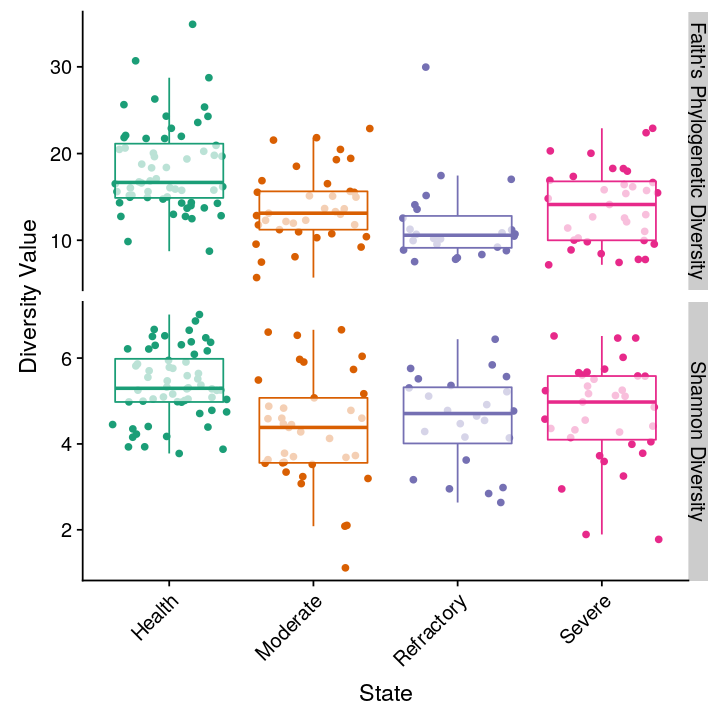

In [3]:
options(repr.plot.width=6, repr.plot.height=6)
labels <- c(faith_pd = "Faith's Phylogenetic Diversity", shannon = "Shannon Diversity")
p <- ggplot(div_tab, aes(x=Type, y=value, colour = Type))  + geom_point(position='jitter') + geom_boxplot(alpha=0.7, outlier.shape = NA) + scale_colour_brewer(palette="Dark2")  + facet_grid(vars(variable), scales="free_y", labeller=labeller(variable = labels)) + ylab("Diversity Value") + xlab("State") + theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none")
p

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


png 
  2

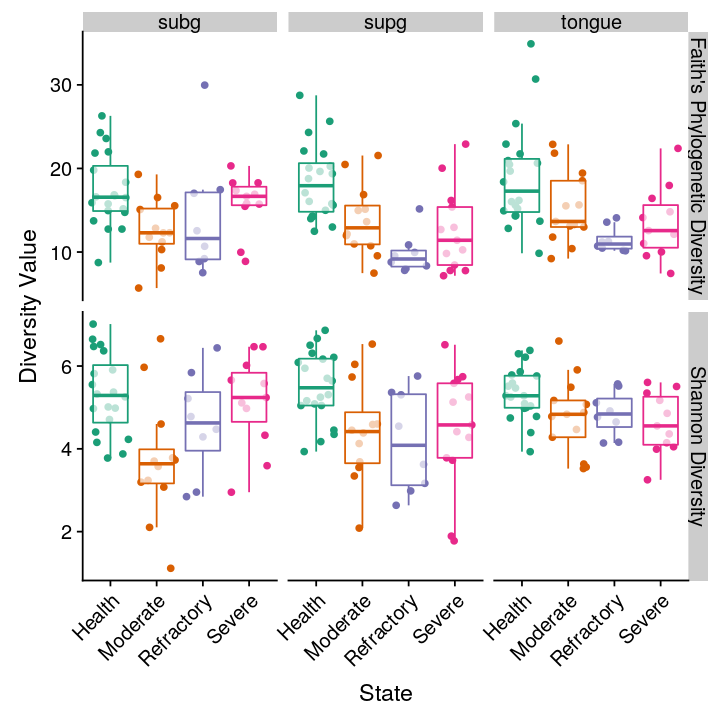

In [4]:
p <- ggplot(div_tab, aes(x=Type, y=value, colour = Type)) + geom_point(position='jitter') + geom_boxplot(alpha=0.7, outlier.shape = NA) + scale_colour_brewer(palette="Dark2") + facet_grid(vars(variable), vars(Site), scales="free_y", labeller=labeller(variable = labels)) + ylab("Diversity Value") + xlab("State") +
  theme(axis.text.x  = element_text(angle=45, hjust = 1, vjust = 1), legend.position = "none") +
  scale_color_brewer(palette="Dark2")
p
pdf("Figure1_colour.pdf", height=6, width=6)
p
dev.off()
pdf("Figure1_bw.pdf", height=6, width=6)
p + scale_color_grey(start=0.8, end=0.2)
dev.off()

## Statistics

### All samples

In [5]:
sub_tab <- div_tab[div_tab$variable == 'shannon',]
pairwise.wilcox.test(sub_tab$value, factor(sub_tab$Type), p.adj="bonferroni")
sub_tab <- div_tab[div_tab$variable == 'faith_pd',]
pairwise.wilcox.test(sub_tab$value, factor(sub_tab$Type), p.adj="bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  sub_tab$value and factor(sub_tab$Type) 

           Health  Moderate Refractory
Moderate   0.00013 -        -         
Refractory 0.01107 1.00000  -         
Severe     0.06185 0.73919  1.00000   

P value adjustment method: bonferroni 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  sub_tab$value and factor(sub_tab$Type) 

           Health  Moderate Refractory
Moderate   0.00011 -        -         
Refractory 6.5e-07 0.04623  -         
Severe     0.00126 1.00000  0.26055   

P value adjustment method: bonferroni 

### Subgingival Samples

In [6]:
sub_tab <- div_tab[div_tab$variable == 'shannon' & div_tab$Site == 'subg',]
pairwise.wilcox.test(sub_tab$value, factor(sub_tab$Type), p.adj="bonferroni")
sub_tab <- div_tab[div_tab$variable == 'faith_pd' & div_tab$Site == 'subg',]
pairwise.wilcox.test(sub_tab$value, factor(sub_tab$Type), p.adj="bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  sub_tab$value and factor(sub_tab$Type) 

           Health Moderate Refractory
Moderate   0.0075 -        -         
Refractory 1.0000 1.0000   -         
Severe     1.0000 0.2245   1.0000    

P value adjustment method: bonferroni 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  sub_tab$value and factor(sub_tab$Type) 

           Health Moderate Refractory
Moderate   0.016  -        -         
Refractory 0.815  1.000    -         
Severe     1.000  0.225    1.000     

P value adjustment method: bonferroni 

### Supragingival samples

In [7]:
sub_tab <- div_tab[div_tab$variable == 'shannon' & div_tab$Site == 'supg',]
pairwise.wilcox.test(sub_tab$value, factor(sub_tab$Type), p.adj="bonferroni")
sub_tab <- div_tab[div_tab$variable == 'faith_pd' & div_tab$Site == 'supg',]
pairwise.wilcox.test(sub_tab$value, factor(sub_tab$Type), p.adj="bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  sub_tab$value and factor(sub_tab$Type) 

           Health Moderate Refractory
Moderate   0.09   -        -         
Refractory 0.13   1.00     -         
Severe     0.29   1.00     1.00      

P value adjustment method: bonferroni 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  sub_tab$value and factor(sub_tab$Type) 

           Health  Moderate Refractory
Moderate   0.04299 -        -         
Refractory 0.00012 0.15146  -         
Severe     0.00970 1.00000  1.00000   

P value adjustment method: bonferroni 

### Tongue samples

In [8]:
sub_tab <- div_tab[div_tab$variable == 'shannon' & div_tab$Site == 'tongue',]
pairwise.wilcox.test(sub_tab$value, factor(sub_tab$Type), p.adj="bonferroni")
sub_tab <- div_tab[div_tab$variable == 'faith_pd' & div_tab$Site == 'tongue',]
pairwise.wilcox.test(sub_tab$value, factor(sub_tab$Type), p.adj="bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  sub_tab$value and factor(sub_tab$Type) 

           Health Moderate Refractory
Moderate   0.34   -        -         
Refractory 0.47   1.00     -         
Severe     0.14   1.00     1.00      

P value adjustment method: bonferroni 


	Pairwise comparisons using Wilcoxon rank sum test 

data:  sub_tab$value and factor(sub_tab$Type) 

           Health  Moderate Refractory
Moderate   0.37297 -        -         
Refractory 0.00073 0.22091  -         
Severe     0.05675 1.00000  1.00000   

P value adjustment method: bonferroni 